<a href="https://colab.research.google.com/github/Suhel1239/Wine_Quality_Predictor/blob/main/WineQualityCheck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wine Quality

In [ ]:
pip install seaborn


In [ ]:
pip install imblearn

In [ ]:
pip install streamlit

### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import pickle

### Importing Datasets

In [ ]:
dataset = pd.read_csv("winequality-red.csv")

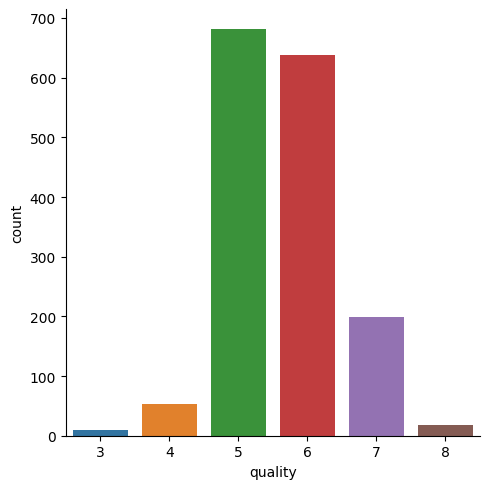

In [ ]:
sb.catplot(data=dataset , x="quality" , kind="count")

In [ ]:
from pandas.compat import numpy

# X = dataset.drop(["quality","free sulfur dioxide"] , axis=1)
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values
# from sklearn.preprocessing import binarize , Binarizer

y = y.reshape(-1,1)
# y = Binarizer(threshold=6).transform(y)

In [ ]:
print(X[0])
print(y[7])

[ 7.4     0.7     0.      1.9     0.076  11.     34.      0.9978  3.51
  0.56    9.4   ]
[7]


In [ ]:
counts = np.unique(y , return_counts=True)
print(counts)

(array([3, 4, 5, 6, 7, 8]), array([ 10,  53, 681, 638, 199,  18]))


## Doing UnderSampling

In [ ]:
# from imblearn.under_sampling import NearMiss
#                # // But it is not good as the data present is very small
# nm = NearMiss()
# X , y = nm.fit_resample(X , y)
   ######## Here Accuracy Decreases

## Doing Oversampling and UnderSampling Combinr

In [ ]:
from imblearn.combine import SMOTETomek
#  // ##### It is a combination of both undersampling and oversanmpling
uo = SMOTETomek()
X,y = uo.fit_resample(X,y)
     ###### Here Accuracy Increses

## Lets Try Oversampling

In [ ]:
# from imblearn.over_sampling import SMOTE
# nm = SMOTE(random_state=42)
# X , y = nm.fit_resample(X,y)
   ###### We Found that combination of both is best

In [ ]:
count = np.unique(y , return_counts=True)
print(count)

(array([3, 4, 5, 6, 7, 8]), array([671, 658, 602, 610, 670, 671]))


In [ ]:
print(X.shape)
print(y.shape)

(3882, 11)
(3882,)


In [ ]:
plt.figure(figsize=(12, 12))
sb.heatmap(dataset.corr(), annot=True, cbar=True , square=True , fmt='.1f' , annot_kws={"size":8} , cmap="Blues")
plt.show()

In [ ]:
print(X.shape)

(3882, 11)


In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state=3)


### Scaling the Data


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_test[0])

[ 0.89436859 -0.9470407   0.95482553  1.64104939 -0.3690588  -0.78023264
 -0.78281262 -0.0088503  -0.66779079  0.70357092  1.56399024]


In [ ]:
print(y_test)

[8 6 4 6 4 4 3 6 4 3 7 4 3 4 7 3 3 6 8 3 8 6 5 6 3 6 4 8 7 3 6 6 5 3 3 8 4
 4 7 6 7 7 6 7 7 7 8 3 8 3 8 6 8 3 6 3 5 3 6 5 3 8 8 4 8 3 4 6 3 8 5 4 8 4
 4 7 3 5 5 3 3 3 4 7 5 4 5 6 4 4 5 3 4 3 8 7 3 5 3 5 6 6 4 7 3 7 7 6 7 7 3
 8 8 7 5 8 4 8 8 3 3 3 7 4 8 8 5 8 3 4 5 3 4 6 4 4 3 5 3 6 8 5 8 8 7 4 8 8
 7 4 4 6 4 3 4 6 8 6 7 3 6 7 7 7 8 6 5 8 6 5 3 4 3 5 7 7 4 4 5 4 7 6 5 5 5
 4 4 7 3 5 4 4 6 6 5 4 7 8 5 3 5 8 3 6 7 8 8 4 7 6 6 5 3 8 5 4 6 5 6 3 6 8
 5 7 3 7 6 3 5 6 7 8 3 7 4 5 3 3 7 5 5 7 4 8 4 6 3 7 8 6 7 7 5 6 5 5 4 3 6
 4 3 5 4 7 7 8 4 5 6 5 5 4 8 7 7 3 7 8 3 8 5 7 4 6 4 5 6 8 6 7 7 6 3 5 7 8
 3 3 7 5 8 3 8 6 8 7 5 3 6 5 8 6 6 7 3 8 3 8 5 7 7 3 3 4 7 6 5 7 5 8 8 6 3
 5 3 5 6 5 7 3 6 4 6 3 8 6 5 6 4 8 5 8 3 3 3 4 5 5 6 3 4 3 8 4 8 6 6 8 7 8
 8 7 7 3 7 6 6 6 4 6 8 3 3 8 5 6 5 5 3 4 8 8 8 7 4 3 4 6 5 3 5 8 7 8 6 6 7
 3 8 8 5 4 3 4 6 5 6 4 3 5 5 7 4 7 5 3 3 5 7 7 8 7 7 6 8 4 4 3 8 7 3 8 6 3
 7 4 8 8 5 8 4 7 5 6 6 8 8 5 6 7 7 4 7 8 4 8 4 7 5 8 6 6 7 7 6 4 3 4 8 3 7
 8 6 6 7 8 7 3 6 4 5 8 4 

## Random Tree Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rand = RandomForestClassifier(n_estimators=10 , criterion='entropy' , random_state=0)
rand.fit(X_train , y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

## Support Vector Regression

In [ ]:
# from sklearn.svm import SVC
# rand = SVC(kernel = 'rbf', random_state = 0)
# rand.fit(X_train, y_train)

## Naive Bayes Classifier

In [ ]:
# from sklearn.naive_bayes import GaussianNB
# rand = GaussianNB()
# rand.fit(X_train, y_train)

## Linear Regression

In [ ]:
# from sklearn.linear_model import LinearRegression
# rand = LinearRegression()
# rand.fit(X_train , y_train)

## Logistic Regression

In [ ]:
# from sklearn.linear_model import LogisticRegression
# rand = LogisticRegression()
# rand.fit(X_train , y_train)

In [ ]:
y_pred = rand.predict(X_test)
y_pred = y_pred.reshape(len(y_pred),1)
print(y_pred)

In [ ]:
m = rand.predict([[7.4,0.35,0.33,2.4,0.068,9,26,0.9946,3.39,0.6,11.9]])
print(m)

[5]


In [ ]:
print(np.concatenate((y_pred.reshape(len(y_pred),1) , y_test.reshape(len(y_test),1)),1))

## Creating The Confusion Matrix and founding Accuracy

In [ ]:
from sklearn.metrics import confusion_matrix , accuracy_score
m = confusion_matrix(y_test , y_pred)
print(m)
print(accuracy_score(y_pred , y_test))

[[140   0   0   0   0   0]
 [  0 124   7   1   0   0]
 [  2  10  87  22   1   0]
 [  0   2  19  85  16   3]
 [  0   0   4   7 108   4]
 [  0   0   0   1   2 132]]
0.87001287001287


## Checking R2 Score

In [ ]:
# from sklearn.metrics import r2_score
# m = r2_score(y_test , y_pred)
# print(m)

In [ ]:
pickle.dump(rand,open('wine.pkl','wb'))

In [ ]:
# from google.colab import files
# files.download('wine.pkl')